# Gossip Girl

In [4]:
import requests, re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml

# Network
## List of charachters/ nodes

In [5]:
#Get list 

import warnings
warnings.filterwarnings('ignore')


def CharacterList(url):
    websiteURL =  requests.get(url)
    soup = BeautifulSoup(websiteURL.text)
    characterGallery = soup.find_all('div',{'class':'category-page__members'})
    characters = []

    for character in characterGallery:

        images = character.findAll("img")
        for image in images:
            try:
                characterName = image.get("alt")
            except:
                pass

            characters.append(characterName)

    return characters


ListOfCharacter = CharacterList("https://gossipgirl.fandom.com/wiki/Category:Characters")
#ListOfCharacter

ListCharachters   = set(ListOfCharacter)

print("number of nodes: ", len(ListCharachters))




number of nodes:  111


### Remove non human nodes

In [6]:
toRemove = ["relationship", 'Gossip', 'Season', 'Tripp\xa0Vanderbilt','Social Media', 'Breakfast', 'Melanie91' ]

toRemove = set(toRemove)
listCharachters = [c for c in ListCharachters if not any(r in toRemove for r in c.split())]

print("number of nodes after stripping: ", len(listCharachters))


number of nodes after stripping:  95


### Create DF 

In [7]:

DF = pd.DataFrame(columns=['Character', 'Family', 'Romances', 'Friends', 'Enemies','size/episodes', 'gender'])
DF['Character'] = listCharachters





### Get edges and relationships

In [8]:

def getRelationship(nodes):
    
    for i, charachter in enumerate(nodes):
        url =  requests.get(f"https://gossipgirl.fandom.com/wiki/{charachter}")
        soup = BeautifulSoup(url.text)

        Family= []
        Romances = []
        Friends = []
        Enemies = []

        try:
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            family =  infoBox.findAll('div', {'data-source':"Family (only TV series)"}) 

            FamilyNames = re.findall('title="(.*?)"',str(family))

            FamilyNames = set(FamilyNames)
            for name in FamilyNames:
                if name in ListCharachters:
                    Family.append(name) 
        except: 
            Family= []
        try: 
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            romances = infoBox.findAll('div', {'data-source':"Romances (only TV series)"})

            romanceNames = re.findall('title="(.*?)"',str(romances))
            romanceNames = set(romanceNames)
            for name in romanceNames:
                if name in ListCharachters:
                    Romances.append(name) 

        except:
            Romances = []
        try: 
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            friends = infoBox.findAll('div', {'data-source':"Friends (only TV series)"})

            friendsNames = re.findall('title="(.*?)"',str(friends))
            friendsNames = set(friendsNames)
            for name in friendsNames:
                if name in ListCharachters:
                    Friends.append(name) 

        except:
            Friends = []

        try: 
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            enemies = infoBox.findAll('div', {'data-source':"Enemies (only TV series)"})

            enemiesNames = re.findall('title="(.*?)"',str(enemies))
            enemiesNames = set(enemiesNames)
            for name in enemiesNames:
                if name in ListCharachters:
                    Enemies.append(name) 
        except:
            Enemies = []

        DF['Family'][i] = Family
        DF['Romances'][i] = Romances
        DF['Friends'][i] = Friends
        DF['Enemies'][i] = Enemies
        DF['size/episodes'][i] = len(Family) + len(Romances) + len(Friends) + len(Enemies)



### Gets gender 

In [9]:
def getGenders():
    websiteURL =  requests.get("https://gossipgirl.fandom.com/wiki/Category:Females")
    soup = BeautifulSoup(websiteURL.text)
    FemaleGallery = soup.find_all('div',{'class':'category-page__members'})
    females = []

    for female in FemaleGallery:

        images = female.findAll("img")
        for image in images:
            try:
                characterName = image.get("alt")
            except:
                pass

            females.append(characterName)

    for i  in range(len(listCharachters)):
        if listCharachters[i] in females:
            DF['gender'][i] = 'pink'
        else: 
            DF['gender'][i] = 'grey'
            

getGenders()
getRelationship(listCharachters)
DF


,Character,Family,Romances,Friends,Enemies,size/episodes,gender
0,Lola Rhodes,"[Eric van der Woodsen, Dan Humphrey, CeCe Rhod...",[Nate Archibald],[Ivy Dickens],[Diana Payne],12,pink
1,Sophie Grimaldi,[Beatrice Grimaldi],[],[],"[Eleanor Waldorf, Cyrus Rose]",3,grey
2,Max Wolfe,[],"[Rafa Caparros, Audrey Hope, Aki Menzies]","[Aki Menzies, Obie Bergmann IV, Monet de Haan,...",[Rafa Caparros],9,grey
3,Alison Humphrey,"[Serena van der Woodsen, Jenny Humphrey, Dan H...",[Rufus Humphrey],[],[Lily van der Woodsen],5,pink
4,Cast Social Media,[],[],[],[],0,grey
...,...,...,...,...,...,...,...
90,Monet de Haan,[],[],"[Aki Menzies, Max Wolfe]","[Kate Keller, Julien Calloway]",4,pink
91,Poppy Lifton,[],[Gabriel Edwards],[Gabriel Edwards],"[Serena van der Woodsen, Georgina Sparks]",4,pink
92,Waldorf penthouse,[],[],[],[],0,grey
93,Jessica Leitenberg,[],[],"[Juliet Sharp, Penelope Shafai, Kati Farkas, S...",[],4,pink


### help functions

In [10]:
## help function 

#get edge colors
def getEdgeColors(edges, edgeListFamily, edgeListRomances, edgeListFriends):
    colors = []
    for e in edges:
        if e in edgeListFamily:
            colors.append("grey")
        elif e in edgeListRomances:
            colors.append("pink")
        elif e in edgeListFriends:
            colors.append("blue")
        else: 
            colors.append("purple")
    return colors

def getGender(node):
    return DF['gender'][listCharachters.index(node)]

def getSize(node):
    return DF['size/episodes'][listCharachters.index(node)]

### Creates the whole network

[2420, 620, 1820, 1020, 20, 820, 620, 1020, 2620, 2220, 220, 1820, 1820, 2620, 620, 2220, 820, 1220, 1420, 4420, 1020, 1020, 3020, 1020, 620, 620, 2420, 220, 820, 620, 1020, 1420, 620, 420, 20, 5020, 420, 3020, 2820, 2420, 1220, 420, 820, 1420, 820, 1020, 1220, 1420, 620, 1620, 2020, 20, 420, 820, 220, 420, 220, 420, 1220, 20, 5020, 1420, 1020, 2020, 20, 1620, 820, 20, 5220, 1220, 420, 3020, 620, 20, 4420, 1020, 3820, 1020, 420, 2220, 2020, 220, 6620, 220, 1020, 820, 20, 620, 420, 420, 820, 820, 20, 820, 820]


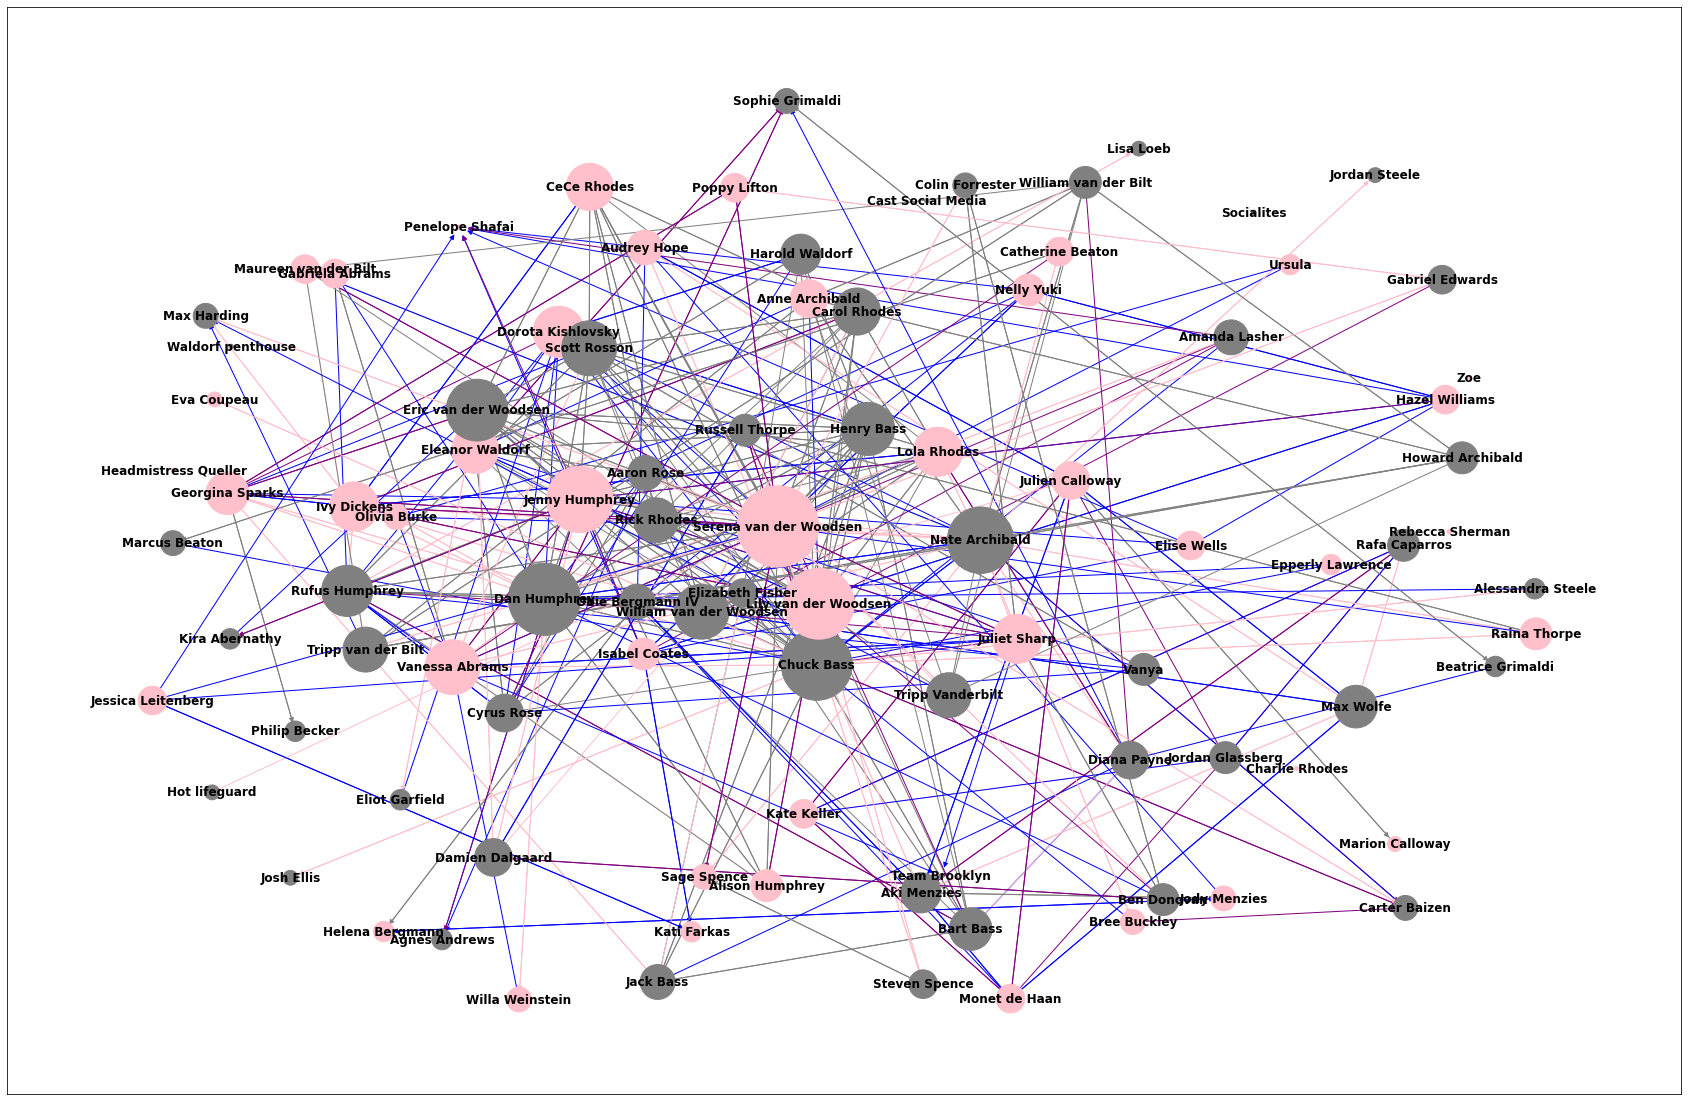

In [11]:
## create network with nodes and edges
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
 
edgeListFamily = []
edgeListRomances = []
edgeListFriends = []
edgeListEnemies = []


def createNetwork():

    edgeListFamily = []
    edgeListRomances = []
    edgeListFriends = []
    edgeListEnemies = []
    for i in range(len(listCharachters)):
        for j in DF['Family'][i]:
            if(j in listCharachters):
                edgeListFamily.append((listCharachters[i],j))

        for j in DF['Romances'][i]:
            if(j in listCharachters):
                edgeListRomances.append((listCharachters[i],j))

        for j in DF['Friends'][i]:
            if(j in listCharachters):
                edgeListFriends.append((listCharachters[i],j))

        for j in DF['Enemies'][i]:
            if(j in listCharachters):
                edgeListEnemies.append((listCharachters[i],j))


    fig, ax = plt.subplots()
    fig.set_size_inches(30,20)

    G = nx.DiGraph()
    G.add_nodes_from(listCharachters)
    G.add_edges_from(edgeListFamily)
    G.add_edges_from(edgeListRomances)
    G.add_edges_from(edgeListFriends)
    G.add_edges_from(edgeListEnemies)



    sizes = DF['size/episodes']
    gender = DF['gender']
    nodesizes = [int(s)*200+20 for s in sizes]
    print(nodesizes)


    pos = nx.spring_layout(G, k=6*1/np.sqrt(len(G.nodes())), iterations=20)
    nx.draw_networkx_nodes(G, pos=pos, node_size = nodesizes, node_color= gender )
    nx.draw_networkx_edges(G,pos=pos, width=1, edge_color=getEdgeColors(G.edges, edgeListFamily, edgeListRomances, edgeListFriends))
    nx.draw_networkx_labels(G,pos=pos, font_weight='bold',font_color='black')
    plt.show()
    
    return G  

#get edge colors
def getEdgeColors(edges, edgeListFamily, edgeListRomances, edgeListFriends):
    colors = []
    for e in edges:
        if e in edgeListFamily:
            colors.append("grey")
        elif e in edgeListRomances:
            colors.append("pink")
        elif e in edgeListFriends:
            colors.append("blue")
        else: 
            colors.append("purple")
    return colors
    

createNetwork()



### Create Network for one node/charachter


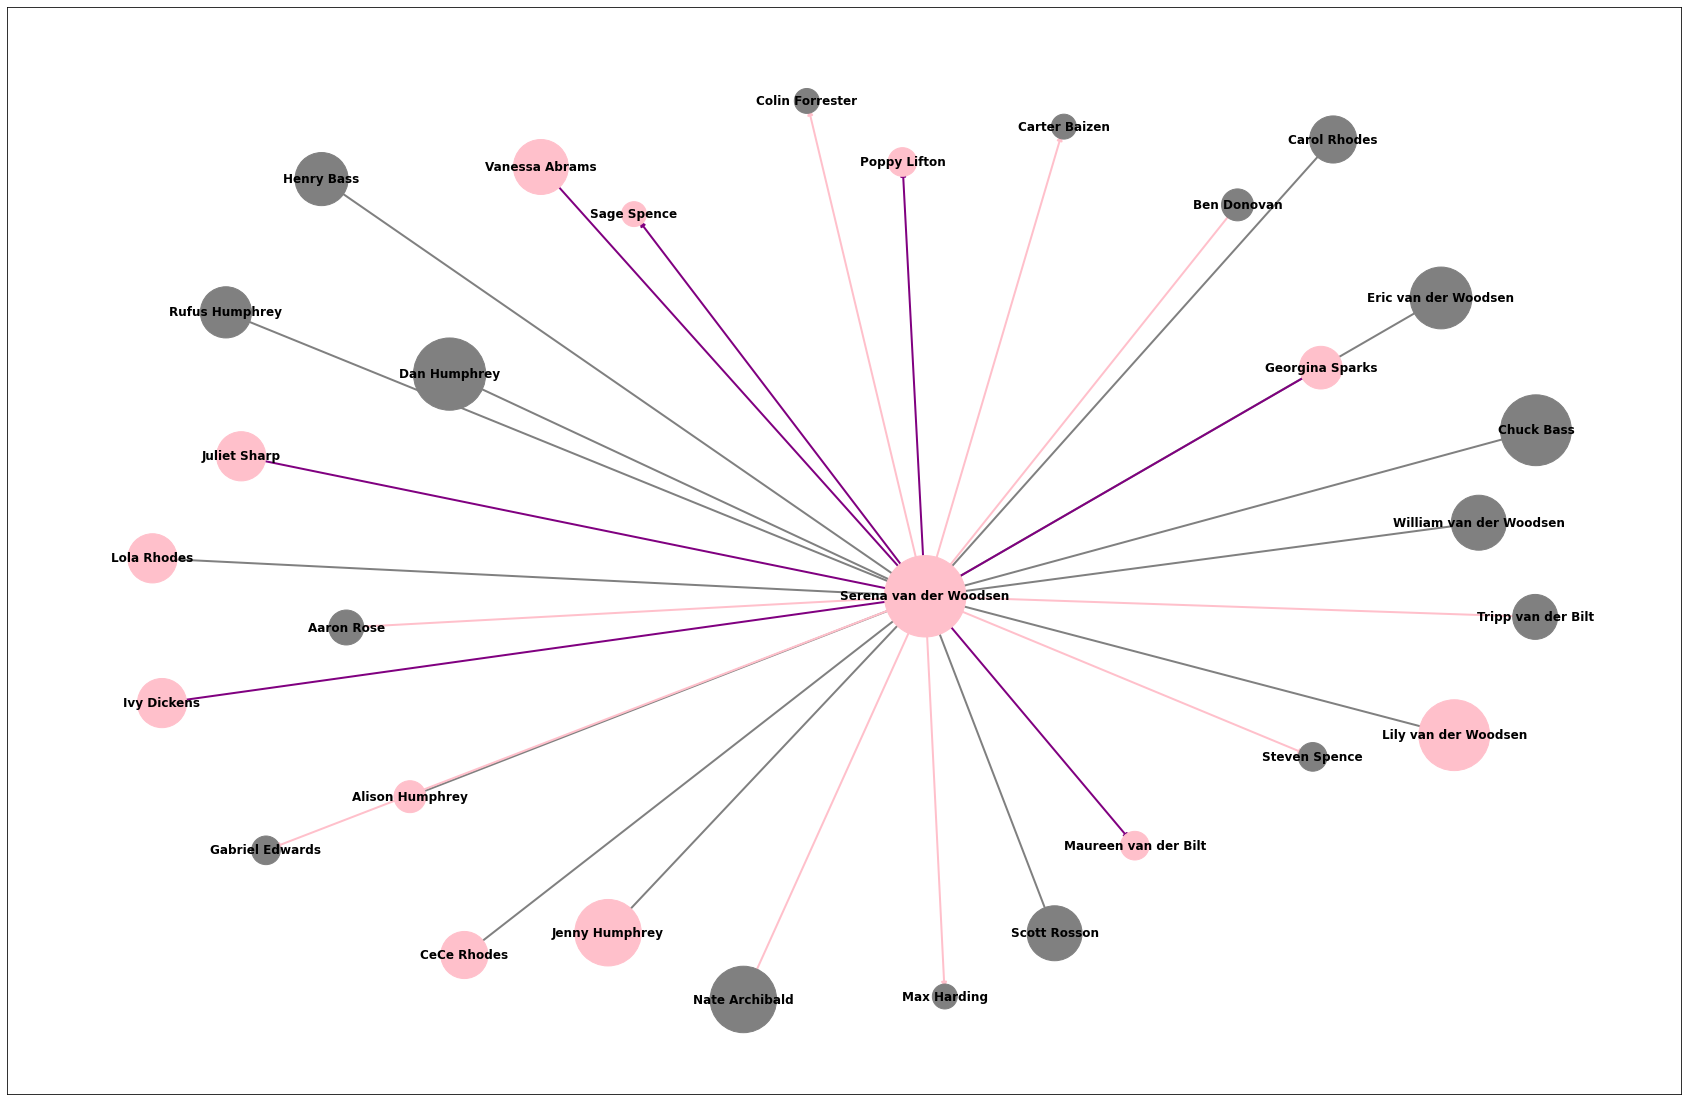

In [12]:
## Create network for one node with belonging neidgbors and edges

def createNetworkSingleNode(node):
    
    G = nx.DiGraph()
    
    edgeListFamily = []
    edgeListRomances = []
    edgeListFriends = []
    edgeListEnemies = []
    
    sizes = []
    gender = []
    
    i = listCharachters.index(node)
    for j in DF['Family'][i]:
        if(j in listCharachters):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListFamily.append((listCharachters[i],j))

    for j in DF['Romances'][i]:
        if(j in listCharachters and j not in G.nodes):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListRomances.append((listCharachters[i],j))

    for j in DF['Friends'][i]:
        if(j in listCharachters and j not in G.nodes):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListFriends.append((listCharachters[i],j))

    for j in DF['Enemies'][i]:
        if(j in listCharachters and j not in G.nodes):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListEnemies.append((listCharachters[i],j))

    sizes.append(DF['size/episodes'][i])
    gender.append(DF['gender'][i])
    fig, ax = plt.subplots()
    fig.set_size_inches(30,20)
    
    G.add_edges_from(edgeListFamily)
    G.add_edges_from(edgeListRomances)
    G.add_edges_from(edgeListFriends)
    G.add_edges_from(edgeListEnemies)

    nodesizes = [int(s)*200+20 for s in sizes]

    pos = nx.spring_layout(G, k=6*1/np.sqrt(len(G.nodes())), iterations=20)
    nx.draw_networkx_nodes(G, pos=pos, node_size = nodesizes, node_color= gender )
    nx.draw_networkx_edges(G,pos=pos, width=2, edge_color=getEdgeColors(G.edges, edgeListFamily, edgeListRomances, edgeListFriends))
    nx.draw_networkx_labels(G,pos=pos, font_weight='bold',font_color='black')
    plt.show()
    plt.savefig
    

createNetworkSingleNode('Serena van der Woodsen')



### Info about graph 

### 10 most conected charachters

[2420, 620, 1820, 1020, 20, 820, 620, 1020, 2620, 2220, 220, 1820, 1820, 2620, 620, 2220, 820, 1220, 1420, 4420, 1020, 1020, 3020, 1020, 620, 620, 2420, 220, 820, 620, 1020, 1420, 620, 420, 20, 5020, 420, 3020, 2820, 2420, 1220, 420, 820, 1420, 820, 1020, 1220, 1420, 620, 1620, 2020, 20, 420, 820, 220, 420, 220, 420, 1220, 20, 5020, 1420, 1020, 2020, 20, 1620, 820, 20, 5220, 1220, 420, 3020, 620, 20, 4420, 1020, 3820, 1020, 420, 2220, 2020, 220, 6620, 220, 1020, 820, 20, 620, 420, 420, 820, 820, 20, 820, 820]


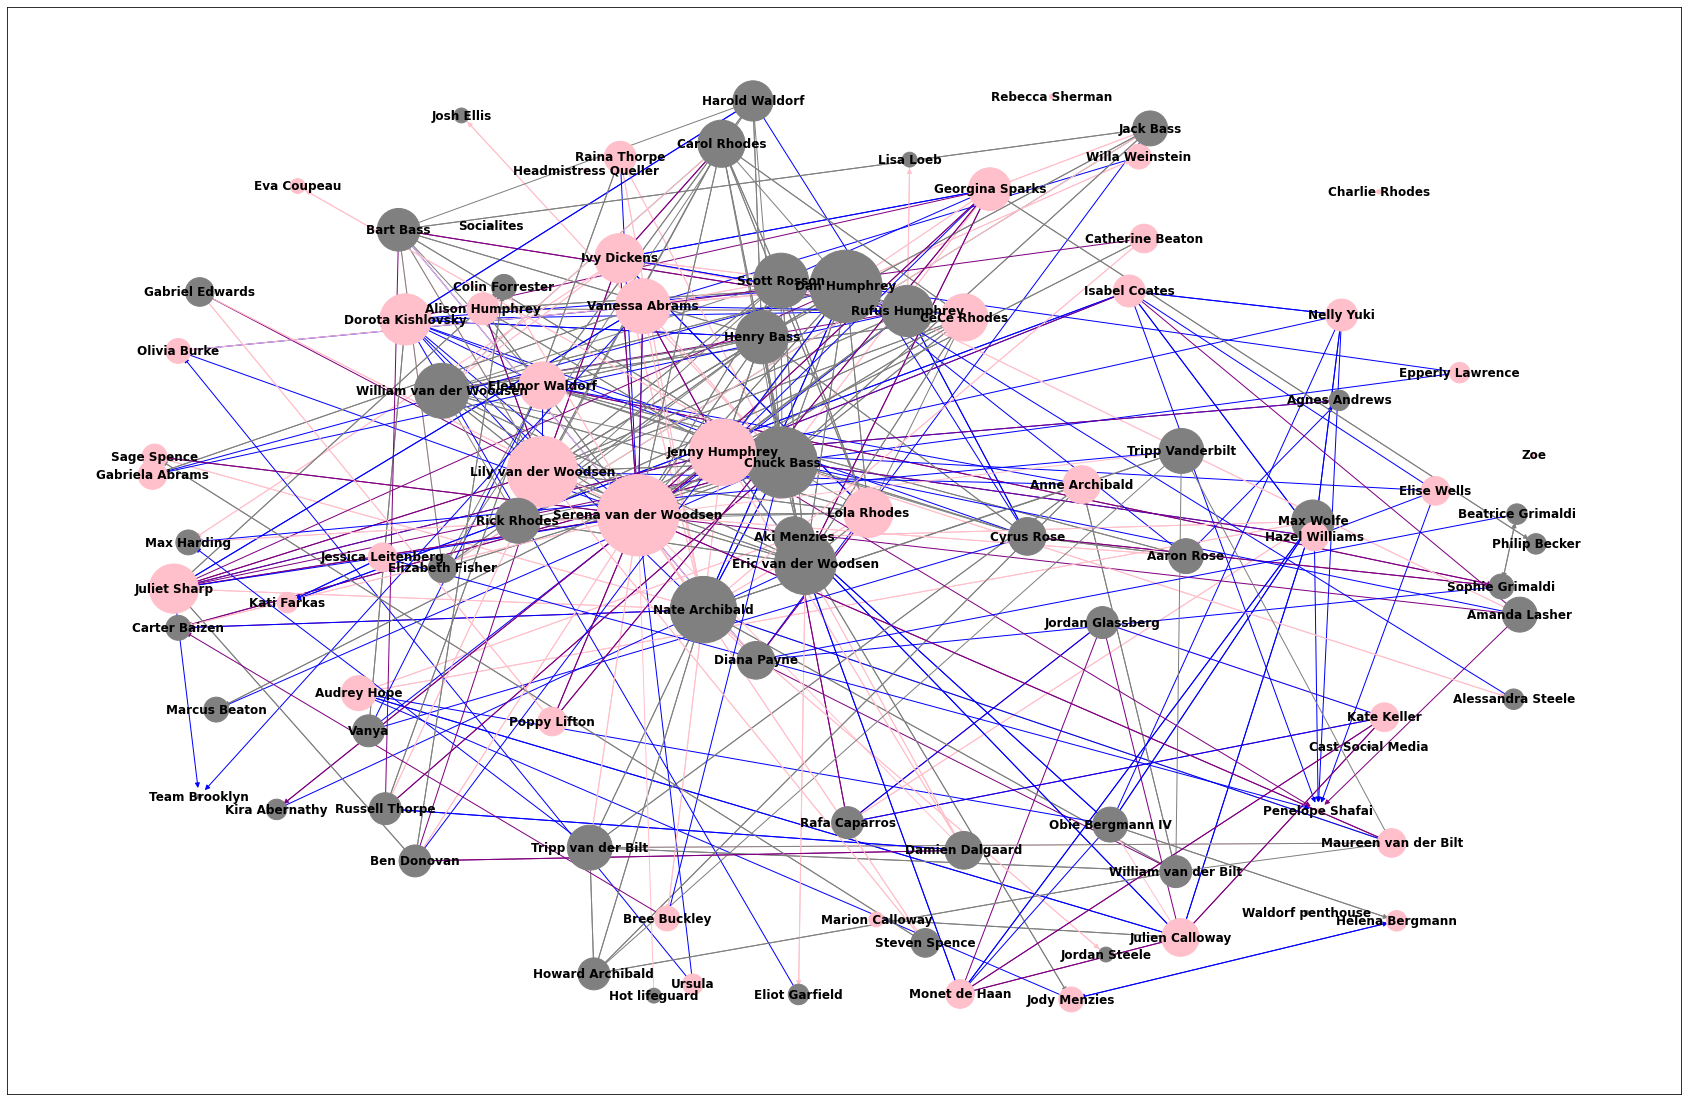

Number of edges in the directed graph is 525
Number of edges in the Undirected graph is 315
The ten nodes with the highest degree is  [('Serena van der Woodsen', 68), ('Chuck Bass', 52), ('Dan Humphrey', 44), ('Nate Archibald', 42), ('Lily van der Woodsen', 42), ('Jenny Humphrey', 36), ('Eric van der Woodsen', 31), ('Henry Bass', 29), ('Rufus Humphrey', 25)]


In [13]:
# Info. graph 
G = createNetwork()
print("Number of edges in the directed graph is", G.number_of_edges())

H = G.to_undirected()

print("Number of edges in the Undirected graph is", H.number_of_edges())

SortedG = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("The ten nodes with the highest degree is ",  SortedG[:9] )


# Word clouds for the top 10 most conected components 



In [14]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olinezachariassen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/olinezachariassen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olinezachariassen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Clean Text


In [53]:

charachters10 = SortedG[:9]


def getCleanText(charachter):
    
    try: 

        #for i, charachter in enumerate(charachters10):
        url =  requests.get(f"https://gossipgirl.fandom.com/wiki/{charachter}#Television_Series")
        soup = BeautifulSoup(url.text)

        infoBox = soup.findAll('div',{'class':'main-container'})
        infoBox = soup.findAll('div',{'class':'resizable-container'})
        infoBox = soup.findAll('div',{'class':'page has-right-rail'})
        infoBox = soup.findAll('div',{'class':'page-content'})
        infoBox = soup.findAll('p')[3:]



        letters_only = re.sub("[^a-zA-Z]"," ",str(infoBox))
        text = re.sub(r'\<.*?\>', '', letters_only)
        text = re.sub(r'\{\{.*?\}\}', '', text)
        text = re.sub(r'\[\[.*?\]\]', '', text)
        text_tokens = word_tokenize(text)
        tokens = [word for word in text_tokens if not word in stopwords.words()]
        removeList = ['p', 'a']
        tokens = [word for word in text_tokens if not word in removeList]
        
        return tokens
    
    except:
        
        return []
        


    
   


        


In [58]:
charachters10 = ['Serena van der Woodsen', 'Chuck Bass', 'Dan Humphrey','Nate Archibald','Lily van der Woodsen','Jenny Humphrey','Eric van der Woodsen','Henry Bass','Rufus Humphrey']


charachterDict = {}
for character in charachters10:
    charachterDict[character] = getCleanText(character)


['Serena van der Woodsen', 'Chuck Bass', 'Dan Humphrey', 'Nate Archibald', 'Lily van der Woodsen', 'Jenny Humphrey', 'Eric van der Woodsen', 'Henry Bass', 'Rufus Humphrey']


## wordCloud

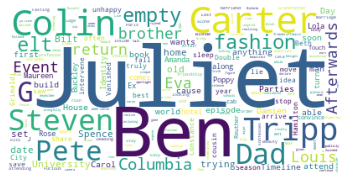

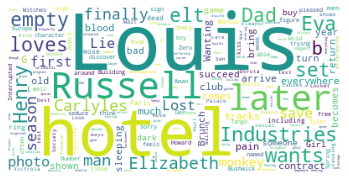

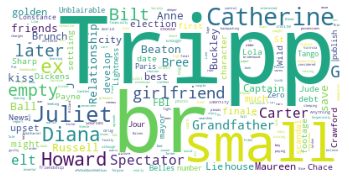

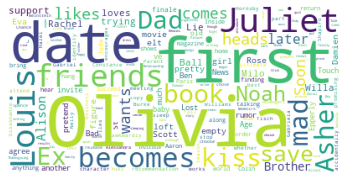

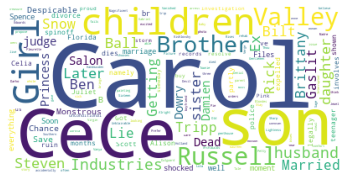

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def term_count(titleList):
    termCount = {}
    for word in titleList:
        if word in termCount:
            termCount[word] +=1
        else: 
            termCount[word]= 1 

    return termCount

collectionText = nltk.TextCollection([charachterDict['Serena van der Woodsen'], charachterDict['Chuck Bass'], charachterDict['Nate Archibald'],charachterDict['Dan Humphrey'],charachterDict['Lily van der Woodsen']])



def idf(text):
    idf= {}
    for word in text:
        idf[word] = text.idf(word)
    return idf
        

def tc_idf(title):
    idfs = idf(collectionText)
    tc_idf= {}
    for word in charachterDict[title]:
        tc_idf[word] = int(math.ceil(idfs[word])) * term_count(charachterDict[title])[word]
    return tc_idf

Serena_tc_idf= tc_idf('Serena van der Woodsen')
Chuck_tc_idf= tc_idf('Chuck Bass')
Nate_tc_idf= tc_idf('Nate Archibald')
Dan_tc_idf= tc_idf('Dan Humphrey')
Lily_tc_idf= tc_idf('Lily van der Woodsen')
tc_idfs = [Serena_tc_idf, Chuck_tc_idf, Nate_tc_idf, Dan_tc_idf,Lily_tc_idf]
        
for tcidf in tc_idfs:  
    strng = ""
    for key,value in tcidf.items():
        strng+= ((key+ " ") * value)
    
    
   
    wordcloud = WordCloud(background_color="white",collocations=False).generate(strng)
    img=plt.imshow(wordcloud)
    
    plt.axis("off")
    plt.show()